In [278]:
sns.set(color_codes=True)
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [279]:
iris=pd.read_csv("/home/bultut/Downloads/Data_Science/IRIS.csv")

In [280]:
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [281]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [282]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [283]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [284]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [285]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [286]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

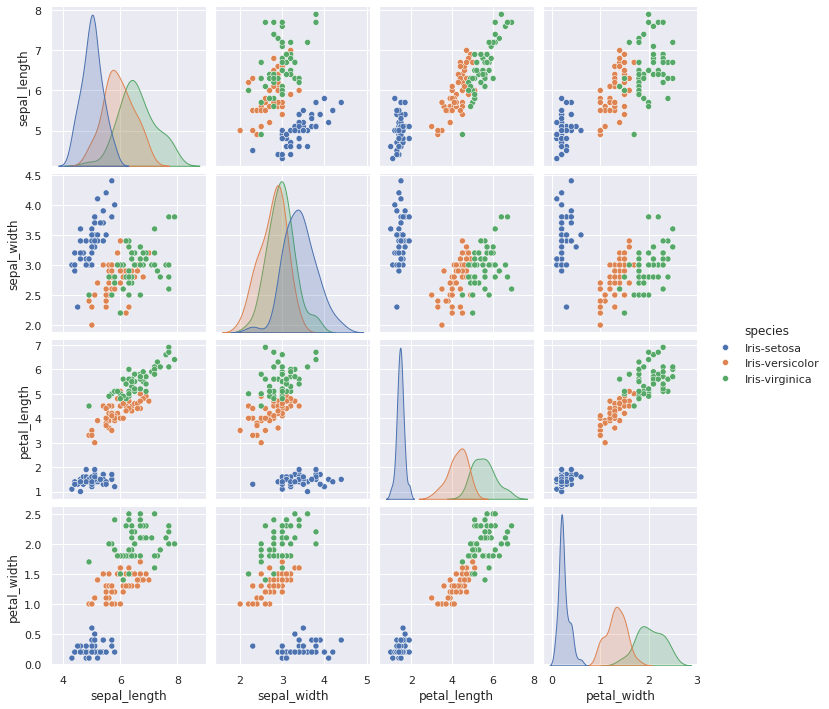

In [287]:
sns.pairplot(iris,hue="species")

<AxesSubplot:>

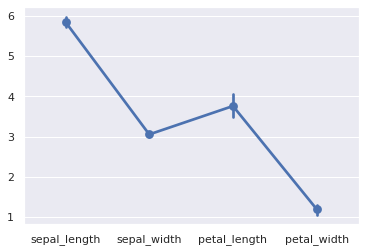

In [288]:
sns.pointplot(iris)

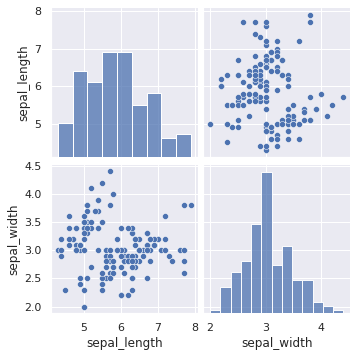

In [289]:
sns.pairplot(iris[['sepal_length','sepal_width']])

<AxesSubplot:>

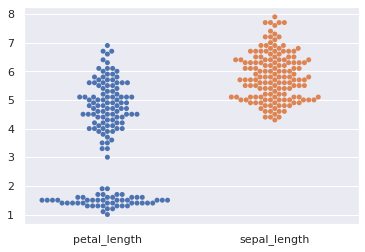

In [290]:
sns.swarmplot(iris[['petal_length','sepal_length']])

separating features and target using matrices syntax

In [291]:
Iris_data=iris.values
print(Iris_data)

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 

In [292]:
X=Iris_data[:,0:4]
Y=Iris_data[:,4]
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [293]:
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

##splitting data into TRAINING and TESTING

In [294]:
X_test,X_train,y_test,y_train=train_test_split(X,Y,test_size=0.2,random_state=3)

#SVM algorithm

In [295]:
model1=SVC()
model1.fit(X_train,y_train)
prediction_x=model1.predict(X_test)

In [296]:
from sklearn.metrics import accuracy_score

In [297]:
accuracy_score=accuracy_score(y_test,prediction_x)

In [298]:
print((accuracy_score)*100)

93.33333333333333


#SVC accuracy is 93%

let's compare the values

In [299]:
for z in range(len(prediction_x)):
    print(y_test[z],prediction_x[z])

Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-s

Let;s now try another algorithm. This time round we use decision tree classifier

In [300]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [301]:
from sklearn.metrics import accuracy_score
prediction_y=model2.predict(X_test)
accurate=accuracy_score(y_test,prediction_y)
print((accurate)*100)

96.66666666666667


The accuracy is 97.5%

Let's compare the values

In [302]:
for z in range(len(prediction_y)):
    print(Y_test[z],prediction_y[z])

Iris-versicolor Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-versicolor
Iris-versicolor Iris-setosa
Iris-virginica Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-setosa
Iris-versicolor Iris-virginica
Iris-setosa Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-versicolor
Iris-versicolor Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-virginica
Iris-virginica Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-setosa
Iris-setosa Iris-virginica
Iris-versicolor Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-setosa
Iris-setosa Iris-virginica
Iris-versicolor Iris-virginica
Iris-virginica Iris-setosa
Iris-

We've got three errors now

Now let's use logistic regression model

In [303]:
from sklearn.linear_model import LogisticRegression

In [304]:
model3=LogisticRegression()
model3.fit(X_train,y_train)


LogisticRegression()

In [305]:
prediction_z=model3.predict(X_test)
accuracy=accuracy_score(y_test,prediction_z)
print((accuracy)*100)

95.83333333333334


In [306]:
for s in range(len(prediction_z)):
    print(Y_test[s],prediction_z[s])

Iris-versicolor Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-versicolor
Iris-versicolor Iris-setosa
Iris-virginica Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-setosa
Iris-versicolor Iris-virginica
Iris-setosa Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-versicolor
Iris-versicolor Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-virginica
Iris-versicolor Iris-virginica
Iris-virginica Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-setosa
Iris-setosa Iris-virginica
Iris-versicolor Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-setosa
Iris-setosa Iris-virginica
Iris-versicolor Iris-virginica
Iris-virginica Iris-setosa
Iris-v

let's use naive bayes now and we compare the models with dummy values

In [307]:
from sklearn.naive_bayes import GaussianNB

In [308]:
model4=GaussianNB()
model4.fit(X_train,y_train)


GaussianNB()

In [309]:
prediction_w=model4.predict(X_test)
ac=accuracy_score(y_test,prediction_w)
print((ac)*100)

94.16666666666667


In [310]:
new_values=np.array([[3,2,1,0.4],[4.5,3.3,2.4,1.4],[5.5,4.7,2.3,1.9]])
prediction=model2.predict(new_values)
print("Prediction species are: {}".format(prediction))

Prediction species are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [311]:
prediction1=model1.predict(new_values)
print("Prediction species are: {}".format(prediction1))

Prediction species are: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [312]:
prediction2=model3.predict(new_values)
print("Prediction species are: {}".format(prediction2))

Prediction species are: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [313]:
prediction3=model4.predict(new_values)
print("Prediction species are: {}".format(prediction3))

Prediction species are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Therefore I choose model4 as the best model